<h1><center>Exploring Weather Trends</center></h1>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Extraction-from-Database-using-SQL" data-toc-modified-id="Data-Extraction-from-Database-using-SQL-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Extraction from Database using SQL</a></span></li><li><span><a href="#Read-the-Tables-and-Some-Exploratory-Analysis" data-toc-modified-id="Read-the-Tables-and-Some-Exploratory-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read the Tables and Some Exploratory Analysis</a></span><ul class="toc-item"><li><span><a href="#import-required-python-library" data-toc-modified-id="import-required-python-library-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>import required python library</a></span></li><li><span><a href="#Dallas-City-Trends" data-toc-modified-id="Dallas-City-Trends-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dallas City Trends</a></span></li><li><span><a href="#Global-Trends" data-toc-modified-id="Global-Trends-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Global Trends</a></span></li></ul></li><li><span><a href="#Similarities-and-Differences-between-Global-Trends-and-Dallas-City-Trends" data-toc-modified-id="Similarities-and-Differences-between-Global-Trends-and-Dallas-City-Trends-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Similarities and Differences between Global Trends and Dallas City Trends</a></span><ul class="toc-item"><li><span><a href="#Observations" data-toc-modified-id="Observations-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Observations</a></span><ul class="toc-item"><li><span><a href="#Observation-01" data-toc-modified-id="Observation-01-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Observation 01</a></span></li><li><span><a href="#Observation-02" data-toc-modified-id="Observation-02-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Observation 02</a></span></li><li><span><a href="#Observation-03" data-toc-modified-id="Observation-03-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Observation 03</a></span></li><li><span><a href="#Observation-04" data-toc-modified-id="Observation-04-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Observation 04</a></span></li></ul></li></ul></li><li><span><a href="#Correlation-and-Linear-Regression" data-toc-modified-id="Correlation-and-Linear-Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Correlation and Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Correlation" data-toc-modified-id="Correlation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Correlation</a></span></li><li><span><a href="#Linear-Regression-Model-Using-scikit-learn" data-toc-modified-id="Linear-Regression-Model-Using-scikit-learn-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Linear Regression Model Using scikit-learn</a></span></li><li><span><a href="#Linear-Regression-Model-Using-statsmodels" data-toc-modified-id="Linear-Regression-Model-Using-statsmodels-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Linear Regression Model Using statsmodels</a></span></li></ul></li></ul></div>

## Data Extraction from Database using SQL

I wanted to compare weather trends of __Dallas City, USA__  with global weather trends. So, first I have extracted data for Dallas from __city_data__ table. I have also extracted global data from __global_data__ table.

 SQL Query for dallas city data:<br>
 **SELECT** * __FROM__ city_data __WHERE__ city = 'Dallas';
 
 SQL Query for global data:<br>
 **SELECT** * __FROM__ global_data;
 

 

I was able to download __csv__ file after successfully running the SQL query.

## Read the Tables and Some Exploratory Analysis

Since I will use python for other projects so I think its better to use python for this project too.


### import required python library

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
# for inline figure
%matplotlib inline

In [3]:
# set figure size and figure format 

plt.rcParams['figure.figsize'] = [10, 6]
%config InlineBackend.figure_format = 'svg'


Following code for not to scroll figure, figure will be fixed in place.

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

### Dallas City Trends

In [5]:
# read dallas city data and called it trend_dallas

trend_dallas = pd.read_csv('data/city_data_dallas.csv')


lets look at the dimensions of the table, there are 194 rows and 4 columns.

In [6]:

trend_dallas.shape

(194, 4)

since there are 194 rows lets look at few rows

In [7]:
trend_dallas.head()

,year,city,country,avg_temp
0,1820,Dallas,United States,16.88
1,1821,Dallas,United States,17.33
2,1822,Dallas,United States,17.87
3,1823,Dallas,United States,17.46
4,1824,Dallas,United States,17.90


lets see is there any missing value. From the table below it seems there is no missing value.

In [8]:
trend_dallas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
year        194 non-null int64
city        194 non-null object
country     194 non-null object
avg_temp    194 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ KB


Some descriptive statistics would not be bad idea.

In [9]:
trend_dallas.describe()

,year,avg_temp
count,194.000000,194.000000
mean,1916.500000,18.065876
std,56.147128,0.680021
min,1820.000000,16.540000
25%,1868.250000,17.612500
50%,1916.500000,18.025000
75%,1964.750000,18.437500
max,2013.000000,20.450000


So the data from year 1820 to 2013 and minimum average temperature was 16.54 and maximum was 20.45 Degree Celsius.

Since year column contain date data I think its better to read that column as dates. What I can do is read the table again with some different parameter.

In [10]:
trend_dallas = pd.read_csv('data/city_data_dallas.csv', 
                           parse_dates=True, 
                           index_col='year')

In [11]:
trend_dallas.head()

,city,country,avg_temp
year,,,
1820-01-01,Dallas,United States,16.88
1821-01-01,Dallas,United States,17.33
1822-01-01,Dallas,United States,17.87
1823-01-01,Dallas,United States,17.46
1824-01-01,Dallas,United States,17.90


Now it seems right and looks good too.

***

I want to see the trend of average temperature in Dallas city.<br>
I will subset the __avg_temp__ column and __year__ column and will save as __trend_dallas_unsmoothed__ and will plot using matplotlib.


In [12]:
trend_dallas_unsmoothed = trend_dallas['avg_temp']['1820-01-01':'2013-01-01']

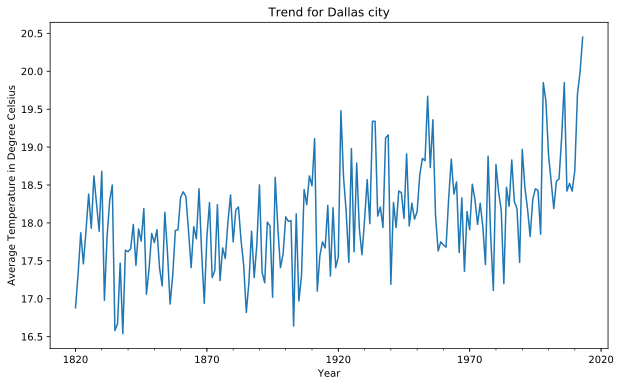

In [13]:
#plot raw data

trend_dallas_unsmoothed.plot();
plt.xlabel('Year');
plt.ylabel('Average Temperature in Degree Celsius');
plt.title('Trend for Dallas city');
%config InlineBackend.figure_format = 'svg'

From above plot it is very hard to see the trend. To see the trend I will calculate moving average of avg_temp and then I will plot again. I will use pandas rolling method and will chain it to mean. <br>
see the code for details

In [14]:
# for reference
# trend_dallas_unsmoothed = trend_dallas['avg_temp']['1820-01-01':'2013-01-01']

# it will continously calculate average for 10 years
dallas_mov_avg = trend_dallas_unsmoothed.rolling(window = 10).mean()


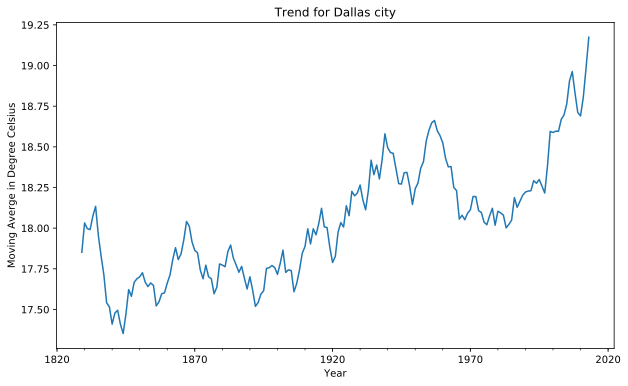

In [15]:
# plot moving average

dallas_mov_avg.plot();
plt.xlabel('Year');
plt.ylabel('Moving Averge in Degree Celsius');
plt.title('Trend for Dallas city');

Above plot tells much more than earlier plot about trend.

If I want to see both in the same plot I can do that.

In [16]:
# create dataframe from dallas_mov_avg and 
# trend_dallas_unsmoothed data

dallas_trend_compare = pd.DataFrame({
    "dallas_mov_avg": dallas_mov_avg,
    "trend_dallas_unsmoothed": trend_dallas_unsmoothed
})

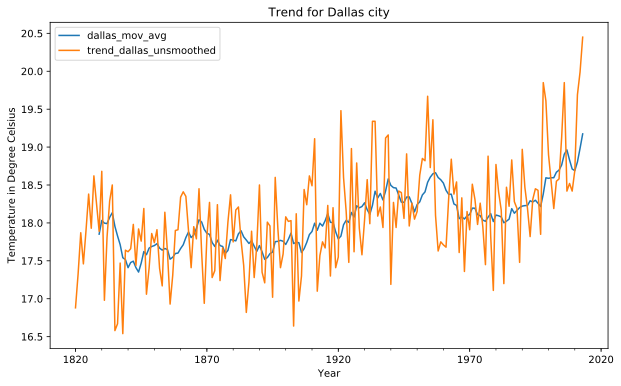

In [17]:
# plot and compare how moving average improved the plot
dallas_trend_compare.plot();
plt.xlabel('Year');
plt.ylabel('Temperature in Degree Celsius');
plt.title('Trend for Dallas city');

Obviously the moving average reduces the noise and make the plot understandable.

> ***

### Global Trends

In [18]:
# read the global data
trend_global = pd.read_csv('data/global_data.csv', 
                           parse_dates=True, 
                           index_col='year')

In [19]:
# take look at the global data

trend_global.head()


,avg_temp
year,
1750-01-01,8.72
1751-01-01,7.98
1752-01-01,5.78
1753-01-01,8.39
1754-01-01,8.47


In [20]:
trend_global.shape

(266, 1)

In [21]:
trend_global.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 1750-01-01 to 2015-01-01
Data columns (total 1 columns):
avg_temp    266 non-null float64
dtypes: float64(1)
memory usage: 4.2 KB


In [22]:
trend_global.describe()

,avg_temp
count,266.000000
mean,8.369474
std,0.584747
min,5.780000
25%,8.082500
50%,8.375000
75%,8.707500
max,9.830000


So there is no missing data and that's good. <br>
The data are from year 1750 to year 2015.<br>
Minimum average temperature was 5.78 and maximum was 9.83 degree Celsius.


For dallas city we have data from 1820 to 2013 only. We don't have data from 1750 to 1819 for dallas. So we can drop those value from global_data and only compare from 1820 to 2013 or we can keep the value. I will keep the all the value.

In [23]:
# convert to series
trend_global_unsmoothed = trend_global['avg_temp']['1750-01-01':'2015-01-01']

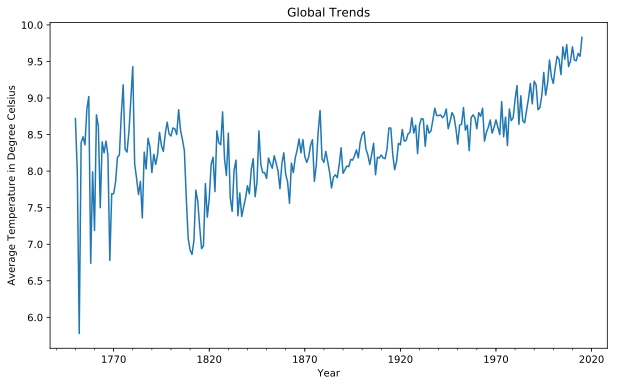

In [24]:
trend_global_unsmoothed.plot();
plt.xlabel('Year');
plt.ylabel('Average Temperature in Degree Celsius');
plt.title('Global Trends');

Again there is lot of noise and I am going to convert to moving average.


In [25]:
# moving average with window 10

global_mov_avg = trend_global_unsmoothed.rolling(window=10).mean()

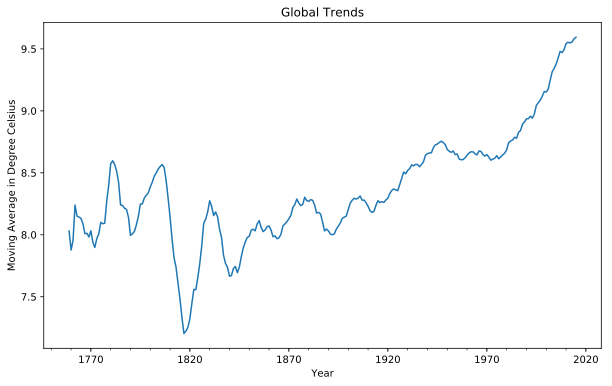

In [26]:
# plot global moving average

global_mov_avg.plot();
plt.xlabel('Year');
plt.ylabel('Moving Average in Degree Celsius');
plt.title('Global Trends');

In [27]:
# create dataframe and compare how plot improved

global_trend_compare = pd.DataFrame({
    "trend_global_unsmoothed": trend_global_unsmoothed,
    "global_mov_avg":global_mov_avg
})


Text(0.5,1,'Plot Comparison of Global Trends')

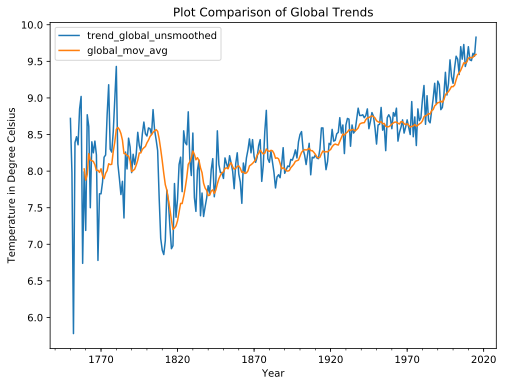

In [28]:
# plot both global plot in same plot
global_trend_compare.plot(figsize= (8,6));
plt.ylabel('Temperature in Degree Celsius');
plt.xlabel('Year')
plt.title('Plot Comparison of Global Trends')

## Similarities and Differences between Global Trends and Dallas City Trends

### Observations

Text(0.5,1,'Comparison of Average Temperature')

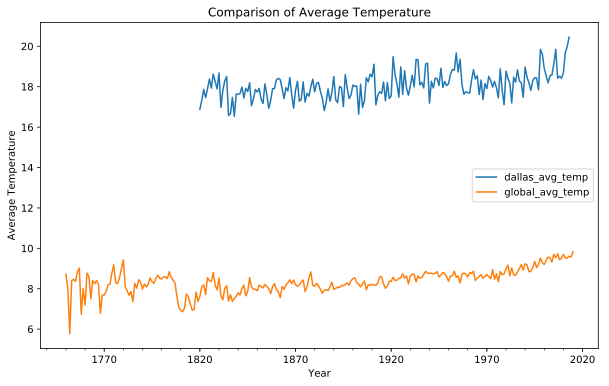

In [29]:
# plot average temperature of global and dallas city

trend_dallas_unsmoothed.plot(label= 'dallas_avg_temp');
trend_global_unsmoothed.plot(label= 'global_avg_temp');
plt.legend(loc =7);
plt.xlabel('Year');
plt.ylabel('Average Temperature');
plt.title('Comparison of Average Temperature')


Text(0.5,1,'Comparison of Moving Average')

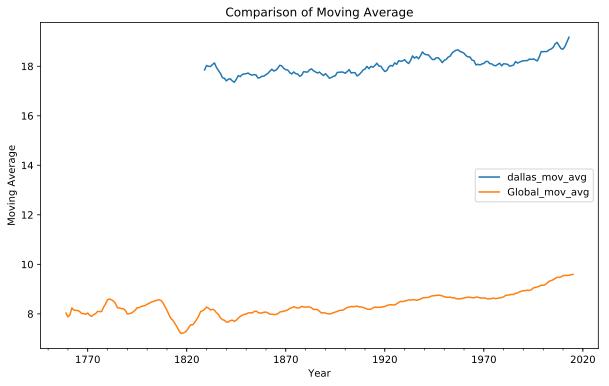

In [30]:
# plot moving average of global and dallas city

dallas_mov_avg.plot(label= 'dallas_mov_avg');
global_mov_avg.plot(label='Global_mov_avg');
plt.legend(loc =7);
plt.xlabel('Year');
plt.ylabel('Moving Average');
plt.title('Comparison of Moving Average')

#### Observation 01

From above two plots I can say that 
Dallas city's average temperature was always higher than global average temperature thats mean __Dallas is hotter__ than global average temperature. The higher temperature of Dallas city compare to global temperature is always consistent over time.

#### Observation 02

At first sight plot below might be confusing. So lets walk through first and then interpret.
Left y_axis represents global moving average(7 to 10) and right y_axis represents Dallas moving average(17 to 19.25) and also see the legend for trends line.

Similar pattern of fluctuation in the plot suggests that when __Global__ average temperature gets __high__, the average temperature of __Dallas__ city also gets __high__. But there are few years like 1865-1875 when opposite occurs, in this case (1865-1875) when global temperature increases Dallas city's temperature decreases.

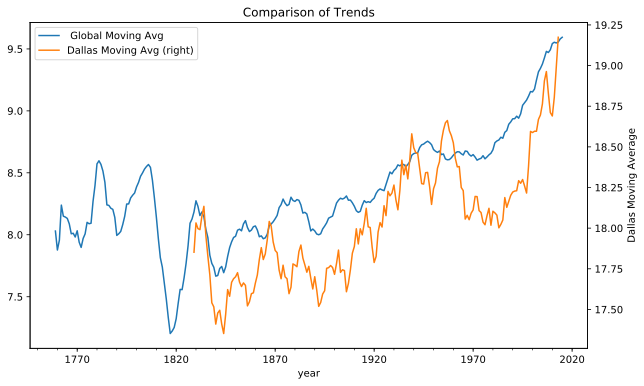

In [31]:


global_mov_avg.plot(label=" Global Moving Avg", 
                    legend=True, );
dallas_mov_avg.plot(secondary_y= True, 
                    label= "Dallas Moving Avg", legend= True );
plt.ylabel('Dallas Moving Average');
plt.title('Comparison of Trends');



#### Observation 03

Continuing from 1820, __overall trends__ of __both__ global and Dallas temperature is __going up__. What that means is the __world is getting hotter__. Starting from 1990, both trend line is going up **faster** than before which means world is getting hotter faster in last two decades. 

#### Observation 04

We don't have data for Dallas city before 1820, but global temperature for 18th century was higher than 19th century. <br> In 20th century global temperature is higher than last two centuries. <br>
In 19th century overall temperature for Dallas city did not increased.<br> 
But in last hundred year average temperature increased more than one degree Celsius for both global and Dallas city.

***

## Correlation and Linear Regression

### Correlation

If I want to know is there any correlation between global average temperature and Dallas city average temperature I can do that.

In [32]:
# lets create dataframe called temp_corr that contain global average temperature 
# and dallas average temperature 

temp_corr = pd.DataFrame({
    'dallas_avg_temp': trend_dallas['avg_temp'],
    'global_avg_temp': trend_global['avg_temp']
})

In [33]:
# descriptive statistics

temp_corr.describe()

,dallas_avg_temp,global_avg_temp
count,194.000000,266.000000
mean,18.065876,8.369474
std,0.680021,0.584747
min,16.540000,5.780000
25%,17.612500,8.082500
50%,18.025000,8.375000
75%,18.437500,8.707500
max,20.450000,9.830000


In [34]:
# structure of dataframe
temp_corr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 1750-01-01 to 2015-01-01
Freq: AS-JAN
Data columns (total 2 columns):
dallas_avg_temp    194 non-null float64
global_avg_temp    266 non-null float64
dtypes: float64(2)
memory usage: 6.2 KB


In [35]:
# checking missing value
temp_corr.isnull().sum()

dallas_avg_temp    72
global_avg_temp     0
dtype: int64

Dallas city contain missing value so I will drop them for now.

In [36]:
temp_corr.dropna(inplace=True);

In [37]:
# check again
temp_corr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 194 entries, 1820-01-01 to 2013-01-01
Freq: AS-JAN
Data columns (total 2 columns):
dallas_avg_temp    194 non-null float64
global_avg_temp    194 non-null float64
dtypes: float64(2)
memory usage: 4.5 KB


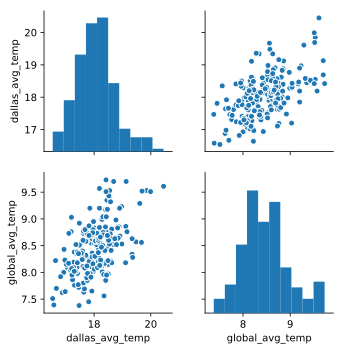

In [38]:
# I can use pairplot from seaborn to see distribution and scatter plot

sns.pairplot(temp_corr);

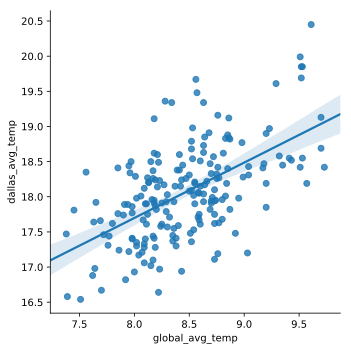

In [39]:
## add regression line
sns.lmplot(x="global_avg_temp", y="dallas_avg_temp", data=temp_corr,);


In [40]:
# find the correlation coefficient

temp_corr.corr()

,dallas_avg_temp,global_avg_temp
dallas_avg_temp,1.000000,0.573722
global_avg_temp,0.573722,1.000000


Correlation Coefficient value 0.57 indicates that there is correlation between global temperature and Dallas city temperature. 

### Linear Regression Model Using scikit-learn

I can build linear regression model which will predict Dallas city average temperature from global average temperature.

In [41]:
# import require library

from sklearn import linear_model

In [42]:
X = pd.DataFrame(temp_corr['global_avg_temp'])
y = pd.DataFrame(temp_corr['dallas_avg_temp'])

In [43]:
lm = linear_model.LinearRegression()

In [44]:
model = lm.fit(X,y)

In [45]:
predictions = lm.predict(X)

In [46]:
# R squared value
round(lm.score(X,y), 4)

0.3292

$R^2$ value 0.3292 suggests that 32.92 percent variability in dependent variable(Dallas avg. temp) can be explained by Independent variable(global avg. temp)

### Linear Regression Model Using statsmodels

In [47]:
import statsmodels.formula.api as smf

In [48]:
reg = smf.ols('dallas_avg_temp ~ global_avg_temp', data = temp_corr).fit() 

In [49]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        dallas_avg_temp   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     94.21
Date:                Tue, 18 Sep 2018   Prob (F-statistic):           2.25e-18
Time:                        19:27:11   Log-Likelihood:                -161.24
No. Observations:                 194   AIC:                             326.5
Df Residuals:                     192   BIC:                             333.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.3964      0.688     16.557      0.000      10.039      12.754
global_avg_temp     0.7877      0.081      9.706      0.000       0.628       0.948
==============================================================================
Omnibus:                        4.124   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                4.035
Skew:                           0.353   Prob(JB):                        0.133
Kurtosis:                       2.972   Cond. No.                         148.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above table, the p value of F statistics is less than 0.05 which indicate that this regression model significantly different than using average value of global avg. temperature to predict Dallas city avg. temperature.

***